In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [200]:
#!pip install googletrans==4.0.0-rc1


In [201]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
from googletrans import Translator
from sklearn.metrics import classification_report

In [202]:
# Download dataset
path = kagglehub.dataset_download("marquis03/flower-classification")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/flower-classification


In [203]:
dataset_path = "/kaggle/input/flower-classification"
print(os.listdir(dataset_path))

['val.csv', 'classname.txt', 'val', 'train.csv', 'train']


In [204]:
train_csv_path = os.path.join(dataset_path, "train.csv")
train_df = pd.read_csv(train_csv_path)
print("Train DataFrame head:")
display(train_df.head())

Train DataFrame head:


,image:FILE,category
0,train/carnation/6838762136_f8254d6a1a_c.jpg,0
1,train/carnation/3540544866_823aee81af_c.jpg,0
2,train/carnation/50034862576_b0f55b7b3b_c.jpg,0
3,train/carnation/26770795691_f662e47143_c.jpg,0
4,train/carnation/18224456534_2f75191d85_c.jpg,0


In [205]:
val_csv_path = os.path.join(dataset_path, "val.csv")
val_df = pd.read_csv(val_csv_path)
print("\nValidation DataFrame head:")
display(val_df.head())



Validation DataFrame head:


,image:FILE,category
0,val/carnation/51286244394_853e894860_c.jpg,0
1,val/carnation/16915050250_4bae79aa6d_c.jpg,0
2,val/carnation/364467920_420ddab32e_c.jpg,0
3,val/carnation/213392504_2eaf4f8816_c.jpg,0
4,val/carnation/3315280754_132d0f2161_c.jpg,0


In [206]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['category'])

In [207]:
print("\nNew Train DataFrame head (after split):")
display(train_df.head())
print("\nNew Test DataFrame head (after split):")
display(test_df.head())


New Train DataFrame head (after split):


,image:FILE,category
1266,train/iris/3556140435_5e09d89daa_c.jpg,1
4583,train/rose/30451315300_62f654558f_c.jpg,4
12604,train/sunflower/35136563713_a685fa5dc3_c.jpg,12
7084,train/calendula/33403062784_f102035ca5_c.jpg,7
7382,train/calendula/50977778478_8bfdaba6fd_c.jpg,7



New Test DataFrame head (after split):


,image:FILE,category
3524,train/california_poppy/34002524316_af83cef4c4_...,3
6005,train/tulip/25918148970_b31de9fdc0_c.jpg,6
138,train/carnation/25851487356_8b0b16750b_c.jpg,0
1364,train/iris/5651251780_aa3f65b87e_c.jpg,1
856,train/carnation/50254242801_f04ab48c45_c.jpg,0


In [208]:
print("\nCategory distribution in the new training set:")
display(train_df['category'].value_counts().sort_index())
print("\nCategory distribution in the new test set:")
display(test_df['category'].value_counts().sort_index())
print("\nCategory distribution in the validation set:")
display(val_df['category'].value_counts().sort_index())


Category distribution in the new training set:


category
0     739
1     833
2     698
3     817
4     789
5     581
6     827
7     809
8     830
9     828
10    789
11    781
12    810
13    782
Name: count, dtype: int64


Category distribution in the new test set:


category
0     185
1     208
2     174
3     204
4     197
5     145
6     207
7     202
8     208
9     207
10    197
11    196
12    203
13    196
Name: count, dtype: int64


Category distribution in the validation set:


category
0     7
1     7
2     7
3     7
4     7
5     7
6     7
7     7
8     7
9     7
10    7
11    7
12    7
13    7
Name: count, dtype: int64

In [209]:
classname_path = os.path.join(dataset_path, "classname.txt")
with open(classname_path, 'r') as f:
    flower_names = [line.strip() for line in f]
print("\nFlower Names:")
for i, name in enumerate(flower_names):
    print(f"Category {i}: {name}")


Flower Names:
Category 0: 康乃馨
Category 1: 鸢尾花
Category 2: 风铃草
Category 3: 金英花
Category 4: 玫瑰
Category 5: 落新妇
Category 6: 郁金香
Category 7: 金盏花
Category 8: 蒲公英
Category 9: 金鸡菊
Category 10: 黑眼菊
Category 11: 睡莲
Category 12: 向日葵
Category 13: 雏菊


In [210]:
try:
    translator = Translator()
    english_flower_names = [translator.translate(name, src='zh-CN', dest='en').text for name in flower_names]
    print("\nFlower Names (English):")
    for i, name in enumerate(english_flower_names):
        print(f"Category {i}: {name}")
except Exception as e:
    print(f"\nCould not translate flower names: {e}")
    english_flower_names = [f"Category {i}" for i in range(len(flower_names))]


Flower Names (English):
Category 0: Carnation
Category 1: iris
Category 2: Bellgrass
Category 3: Kim Young-hua
Category 4: Rose
Category 5: A new wife
Category 6: tulip
Category 7: Calendula
Category 8: Dandelion
Category 9: Chinensis
Category 10: Black-eyed chrysanthemum
Category 11: Water lily
Category 12: sunflower
Category 13: daisy



Displaying sample images from the new training set:


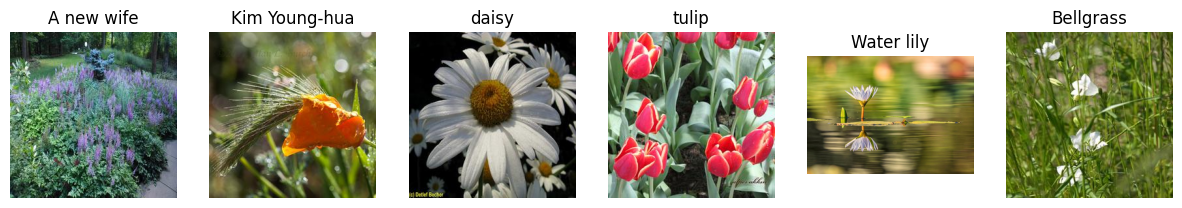

In [211]:
print("\nDisplaying sample images from the new training set:")
plt.figure(figsize=(15, 5))
sample_image_paths = train_df['image:FILE'].sample(6).tolist()
for i, image_path in enumerate(sample_image_paths):
    plt.subplot(1, 6, i + 1)
    img = mpimg.imread(os.path.join(dataset_path, image_path))
    plt.imshow(img)
    category_id = train_df[train_df['image:FILE'] == image_path]['category'].iloc[0]
    if len(english_flower_names) > category_id:
         plt.title(english_flower_names[category_id])
    else:
        plt.title(f"Category {category_id}")
    plt.axis('off')
plt.show()

In [212]:
IMG_SIZE = (224, 224)
def preprocess_image(image_path, category, augment=False):
    image_path = image_path.numpy().decode('utf-8')
    full_path = os.path.join(dataset_path, image_path)
    img = load_img(full_path, target_size=IMG_SIZE)
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)

    if augment:
        img_array = tf.image.random_flip_left_right(img_array)

    return tf.cast(img_array, tf.float32), tf.cast(category, tf.int64)


In [213]:
train_dataset = tf.data.Dataset.from_tensor_slices(
    (train_df['image:FILE'].values, train_df['category'].values)
)
test_dataset = tf.data.Dataset.from_tensor_slices(
    (test_df['image:FILE'].values, test_df['category'].values)
)
val_dataset = tf.data.Dataset.from_tensor_slices(
    (val_df['image:FILE'].values, val_df['category'].values)
)


In [214]:
def tf_preprocess(x, y, augment=False):
    def _wrapped_fn(a, b):
        return preprocess_image(a, b, augment)

    image, label = tf.py_function(func=_wrapped_fn, inp=[x, y], Tout=[tf.float32, tf.int64])
    image.set_shape([224, 224, 3])  # Set shape explicitly for TensorFlow to build graph
    label.set_shape([])             # Label is a scalar
    return image, label


In [215]:
train_dataset = train_dataset.map(lambda x, y: tf_preprocess(x, y, augment=True), num_parallel_calls=tf.data.AUTOTUNE)
val_dataset = val_dataset.map(lambda x, y: tf_preprocess(x, y, augment=False), num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.map(lambda x, y: tf_preprocess(x, y, augment=False), num_parallel_calls=tf.data.AUTOTUNE)


In [216]:
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

In [217]:
print("\nNew Training dataset:", train_dataset)
print("New Test dataset:", test_dataset)
print("Validation dataset:", val_dataset)


New Training dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
New Test dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
Validation dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [218]:
from tensorflow.keras.applications import MobileNetV2

num_categories = pd.read_csv(train_csv_path)['category'].nunique()

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
print("\nBase model loaded successfully.")


Base model loaded successfully.


In [219]:
base_model.trainable = False
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(num_categories, activation='softmax')
])
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_9      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 14)             │        17,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,275,918 (8.68 MB)

 Trainable params: 17,934 (70.05 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [220]:
optimizer = tf.keras.optimizers.Adam()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
metrics = ['accuracy']
model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=metrics)
print("\nModel compiled successfully.")


Model compiled successfully.


In [221]:
EPOCHS = 10
print("\nStarting model training...")
history = model.fit(train_dataset,
                    epochs=EPOCHS,
                    validation_data=val_dataset) 


Starting model training...
Epoch 1/10


I0000 00:00:1752842728.624460     130 service.cc:148] XLA service 0x7cdd0402ef10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752842728.625306     130 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1752842728.625327     130 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1752842729.449912     130 cuda_dnn.cc:529] Loaded cuDNN version 90300


  3/342 ━━━━━━━━━━━━━━━━━━━━ 28s 83ms/step - accuracy: 0.0434 - loss: 2.8528   

I0000 00:00:1752842733.707023     130 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


342/342 ━━━━━━━━━━━━━━━━━━━━ 70s 165ms/step - accuracy: 0.6537 - loss: 1.1521 - val_accuracy: 0.8980 - val_loss: 0.4097
Epoch 2/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 40s 108ms/step - accuracy: 0.8995 - loss: 0.3425 - val_accuracy: 0.8878 - val_loss: 0.3211
Epoch 3/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 38s 103ms/step - accuracy: 0.9234 - loss: 0.2596 - val_accuracy: 0.8878 - val_loss: 0.2711
Epoch 4/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 38s 102ms/step - accuracy: 0.9393 - loss: 0.2085 - val_accuracy: 0.9184 - val_loss: 0.2558
Epoch 5/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 38s 104ms/step - accuracy: 0.9481 - loss: 0.1805 - val_accuracy: 0.9082 - val_loss: 0.2535
Epoch 6/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 38s 102ms/step - accuracy: 0.9552 - loss: 0.1599 - val_accuracy: 0.8980 - val_loss: 0.2473
Epoch 7/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 38s 104ms/step - accuracy: 0.9528 - loss: 0.1592 - val_accuracy: 0.9184 - val_loss: 0.2371
Epoch 8/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 38s 103ms/step - accuracy: 0.9650 - loss: 0.1282 - val

In [222]:
print("\nEvaluating model on the new test dataset...")
loss, accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Evaluating model on the new test dataset...
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 146ms/step - accuracy: 0.9264 - loss: 0.2719
Test Loss: 0.2702
Test Accuracy: 0.9201


In [224]:
print("\nGenerating Classification Report on the new test dataset:")
test_labels = np.concatenate([y.numpy() for x, y in test_dataset], axis=0)
test_predictions = model.predict(test_dataset)
test_predicted_classes = np.argmax(test_predictions, axis=1)
print(classification_report(test_labels, test_predicted_classes, target_names=english_flower_names))


Generating Classification Report on the new test dataset:
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step
                          precision    recall  f1-score   support

               Carnation       0.84      0.89      0.86       185
                    iris       0.91      0.98      0.94       208
               Bellgrass       0.94      0.78      0.86       174
           Kim Young-hua       0.89      0.92      0.90       204
                    Rose       0.93      0.94      0.94       197
              A new wife       0.88      0.89      0.88       145
                   tulip       0.98      0.97      0.98       207
               Calendula       0.86      0.77      0.81       202
               Dandelion       0.97      0.98      0.98       208
               Chinensis       0.87      0.97      0.92       207
Black-eyed chrysanthemum       0.95      0.95      0.95       197
              Water lily       0.98      0.94      0.96       196
               sunflower       0.98      0

86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step


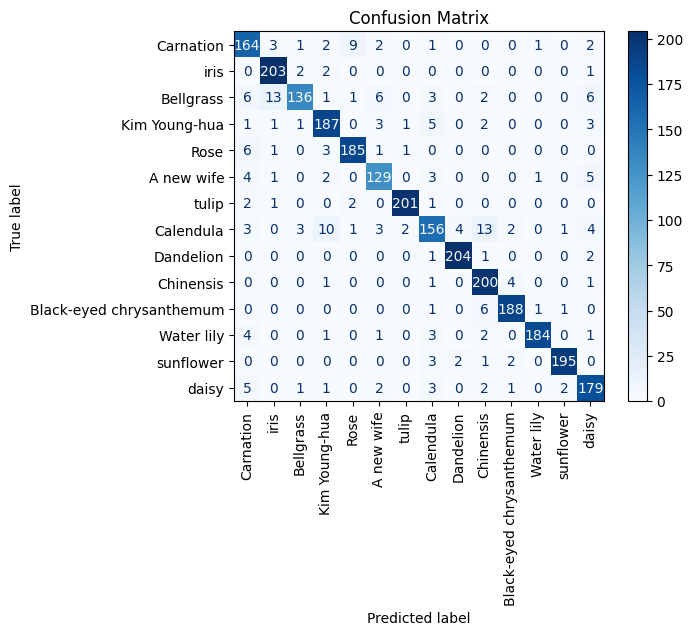

In [227]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_labels = np.concatenate([y for x, y in test_dataset], axis=0)

predictions = model.predict(test_dataset)
predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels, predicted_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=english_flower_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [230]:
model_save_path = '/kaggle/working/flower_classification_model.keras'
model.save(model_save_path)
print(f"Model saved to: {model_save_path}")

Model saved to: /kaggle/working/flower_classification_model.keras
